In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting aesthetics
sns.set(style="whitegrid")

In [32]:
# Diabetes dataset 
df = pd.read_csv(r"C:\Users\Michael Lam\Downloads\Google Coursera downloads\diabetes.csv")

# Preview the data
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
#Exploratory dataset information
# Check dataset info and nulls
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

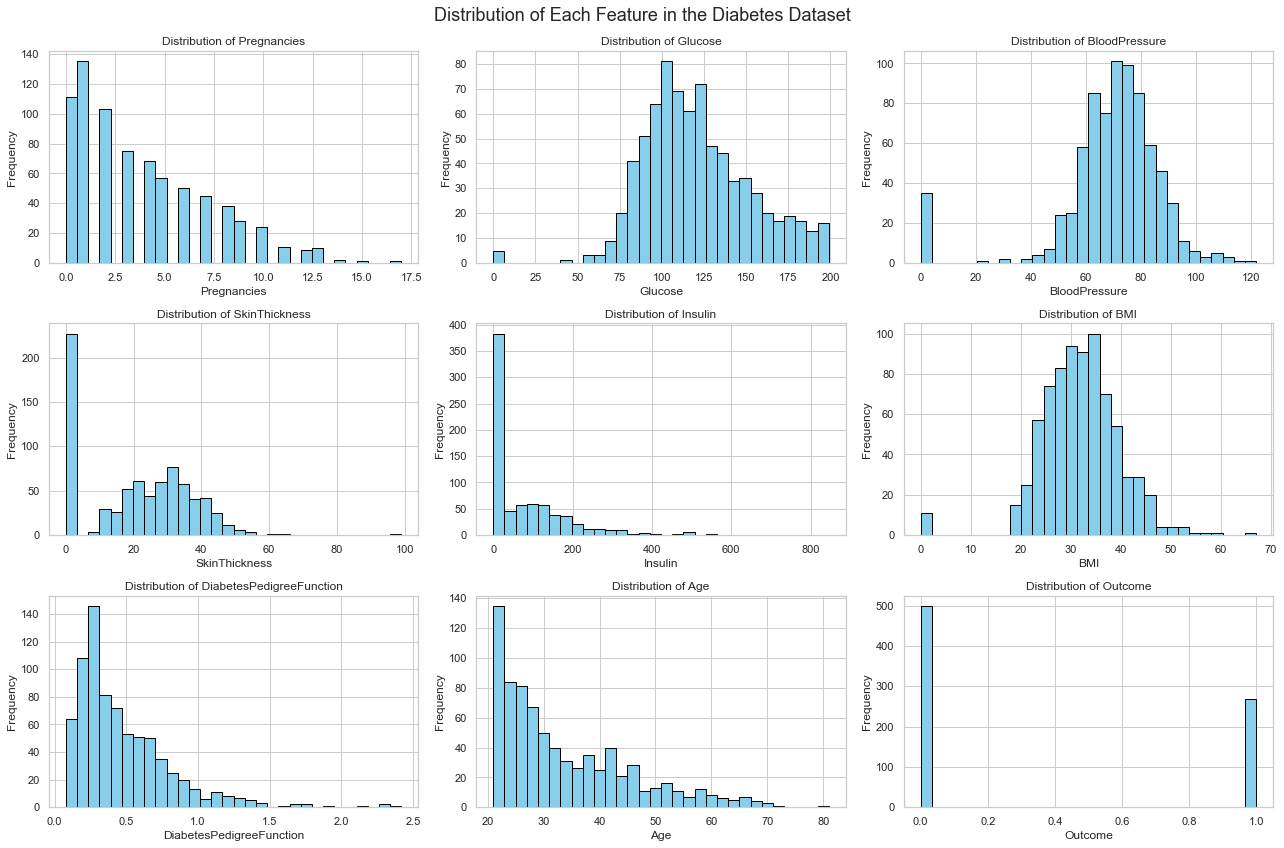

In [34]:
# Visualize Distribution of all columns
# Plot histograms for all features
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle("Distribution of Each Feature in the Diabetes Dataset", fontsize=18)
axes = axes.flatten()

for i, col in enumerate(df.columns):
    df[col].plot(kind='hist', bins=30, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


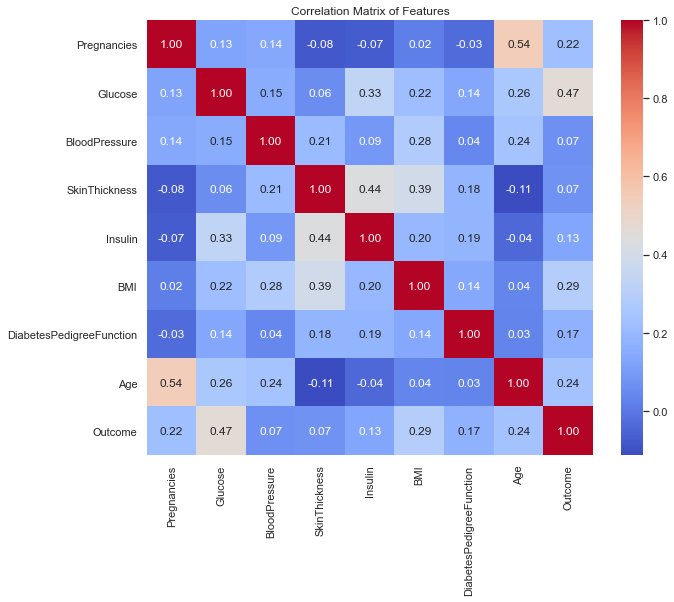

In [35]:
# Correlation Matrix (Heatmap)
# Show correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()


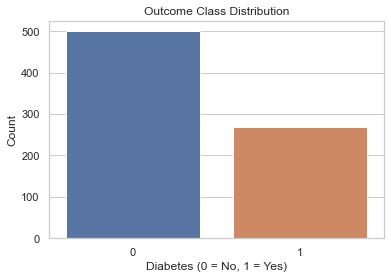

In [36]:
# Outcome Balance
# Check the target class distribution
sns.countplot(x="Outcome", data=df)
plt.title("Outcome Class Distribution")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [37]:
#Sample Logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7467532467532467

Confusion Matrix:
 [[78 21]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [39]:
# 📝 Project Summary

#  **Goal:** Predict whether a person has diabetes based on diagnostic data.
#  **Data:** Pima Indian Diabetes Dataset (8 features, 768 entries)
#  **Steps:**
#  Loaded & explored data
#  Visualized distributions & correlations
#  Built a logistic regression model
#  Achieved an accuracy score with basic evaluation
#  **Next Steps:**
#  Try other models like RandomForest or SVM
#  Perform feature engineering or normalization
#  Handle zero-values in some columns (e.g., BMI or Glucose)


In [40]:
# Let’s check for 0s in columns like Glucose, BMI, Insulin, etc. where zero doesn't make medical sense.
# See how many zeros exist in key columns
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    print(f'{col}: {zero_count} zeros')

Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros


Preview of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


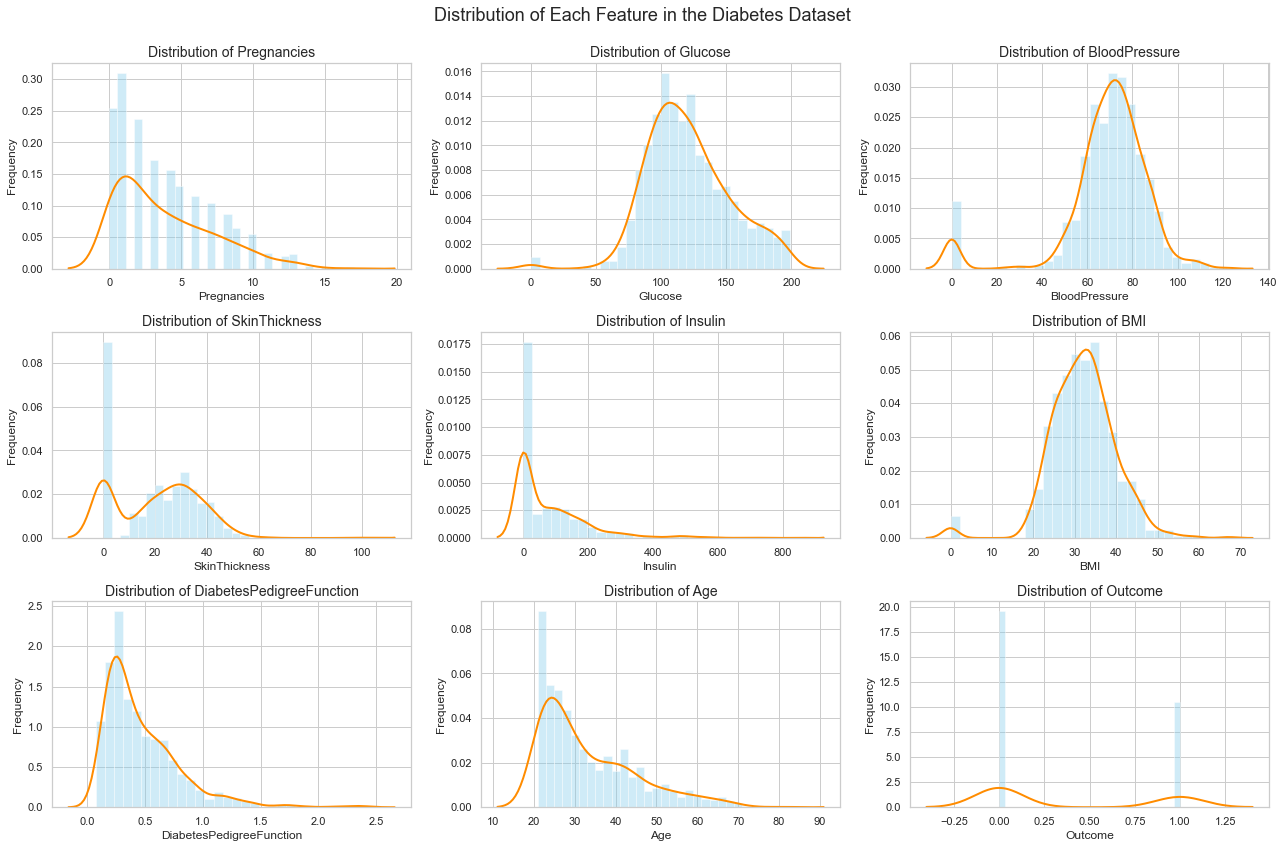

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\Michael Lam\Downloads\Google Coursera downloads\diabetes.csv")

#  Preview the data
print("Preview of the dataset:")
print(df.head())

#  Use seaborn's clean style
sns.set(style="whitegrid")

# Create a 3x3 grid of plots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle("Distribution of Each Feature in the Diabetes Dataset", fontsize=18)

axes = axes.flatten()

# Loop through columns and plot with distplot, colored bars and KDE line
for i, col in enumerate(df.columns):
    sns.distplot(df[col], bins=30, ax=axes[i], color='skyblue', kde=True,
                 kde_kws={"color": "darkorange", "lw": 2})  # KDE line color and width
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [46]:
# The orange line AKA KDE line - Its a smooth curve that estimates the shape of the data's distribution

# Instead of showing just counts in bars (which can be a bit blocky), it draws a smooth line that shows- 

# -where the data is more concentrated or less concentrated.

# It helps you see the “big picture” of how the values spread out,

# like if the data clumps around certain numbers or if it’s more spread out.

In [ ]:
# Think of it like this:

# Imagine you poured a bunch of marbles on a table and wanted to see where most of them landed. 

# The bars count marbles in boxes,but the KDE line draws a smooth hill over the marbles to show where the piles are highest.

In [ ]:
# For data Analysis this is superhelpful!
# Why? 
# It shows the overall pattern more clearly!
# You can spot things like if there are multiple groups (two peaks) or if the data is skewed (long tail).
# Its easier to compare the shape of distributtions with this smooth line.